# **Problem Statement**

Hospital bed availability is a critical operational challenge, particularly in densely populated urban centers like New York City, where patient volume often exceeds capacity. Efficient discharge planning plays a key role in ensuring that hospital resources are used optimally, without compromising the quality of patient care. However, discharge decisions are complex and must balance clinical recovery, risk of readmission, and operational constraints such as bed turnover and cost. Currently, many discharge assessments rely on clinician judgment, which can vary and may not consistently reflect broader system pressures. To address this, we propose a data-driven approach that uses machine learning to predict a patient’s discharge readiness by classifying their expected Length of Stay (LOS). Using the SPARCS Hospital Inpatient Discharges dataset, which contains rich clinical, demographic, and financial data for over 2 million hospitalizations in New York, this project aims to support hospital administrators by ranking patients for discharge based on a multi-factor score. By incorporating variables such as severity of illness, admission type, emergency department usage, and total cost of care, the model can help identify patients who are clinically stable and operationally valuable to discharge—improving hospital efficiency while safeguarding patient outcomes.



# **Key Findings**
Key drivers of discharge readiness
**Principal diagnosis codes (e.g. PNL, MBD)** and emergency admissions dominate the model’s feature importances, so flagging those patients early allows administrators to allocate beds more proactively.

High confidence “Ready for Discharge” group
– Over 85 % of patients predicted as short-stay (1–3 days) are correctly recalled. **By setting a probability threshold (e.g. ≥ 0.7)**, you can safely classify a segment of patients as “Ready for Discharge”, freeing up beds with minimal readmission risk.

“Monitor” cohort needs targeted interventions
– Patients with mid-range scores (e.g. 0.4–0.7) correspond largely to the 4–7 day bin, where recall dips below **50 %**. These should be labeled “Monitor” and prioritized for additional reviews (care-team huddles, specialist consults) to avoid unnecessary prolonged stays or premature discharges.

“Not Ready” high-risk patients
– **Low-probability predictions (< 0.4)** align strongly with high APR severity/mortality codes and longer stays. Label these as “Not Ready for Discharge” and direct extra resources (nursing, case-management) to reduce readmission penalties and ensure quality care.

Operational impact
– Applying this three-tier system can accelerate bed turnover by safely fast-tracking low-risk patients, while concentrating clinical oversight on the middle and high-risk groups—optimizing capacity, cutting costs, and preserving care standards.

# **Exploratory Data Analysis**

## Data Overview

We are using the Hospital Inpatient Discharges (SPARCS De-Identified) dataset for New York City, which contains comprehensive data from 2021 and has been well-maintained and updated through April 1st, 2025.  The dataset consists of approximately 2.13 million inpatient discharge records. It includes a mix of demographic, clinical, administrative, and financial features.

For modeling purposes, the primary target variable, Length of Stay (LOS), was transformed from a continuous variable into a categorical classification task, defined by clinically and operationally relevant buckets.


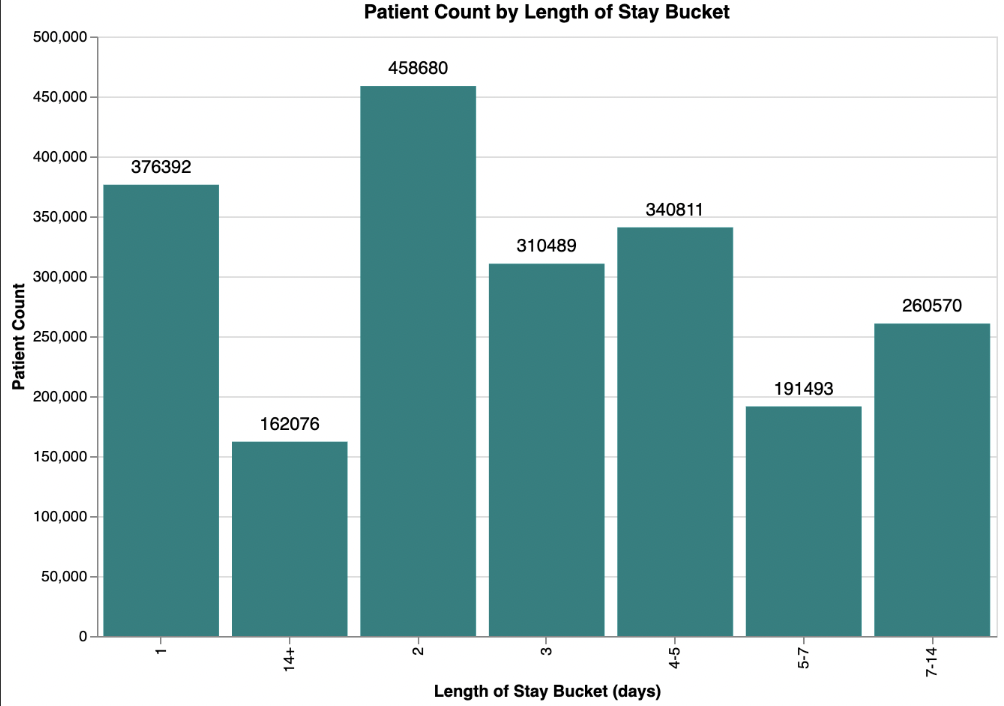

This bar chart displays the distribution of hospital stays across different Length of Stay (LOS) buckets in the dataset. Most patients are discharged within 2–5 days, with the largest group staying exactly 2 days (458,680 patients), followed by 1-day and 4–5 day stays. Extended stays (7–14 days and 14+ days) are less common but still represent a significant patient population. Understanding this distribution is essential for model training, as class imbalance can impact predictive performance and highlights the operational challenge of managing both short and long-stay patients for effective discharge prioritization

## Basic Preprocessing
The dataset was cleaned and prepared through the following key steps:

Missing Value Handling:
Dropped high-missing features (Birth Weight, Payment Typology 2 & 3).
Applied KNN imputation for missing values in Length of Stay.

Outlier Treatment:
Detected outliers in cost features and clipped values using IQR to reduce skew.

Target Engineering:
The dataset contains many categorical variables—for example, the variable “APR Severity of Illness Description” includes categories such as Major, Minor, Moderate, and Extreme. To enhance model performance, we applied distribution-aware encoding techniques, including target encoding and one-hot encoding
Converted Length of Stay into categorical buckets (1–2, 3–5, 6+ days) for classification.

Feature Reduction:
Removed one low-variance feature to reduce noise.

Encoding:
Categorical variables were encoded for model compatibility.

Correlation Analysis:
Used a correlation matrix to assess linear relationships.
Clinical severity (APR Severity, Risk of Mortality) showed the strongest positive correlation with Length of Stay.

## Correlation Analysis

Next, we explaored the correlation analysis of each feature. To assess which features are most associated with Length of Stay, we calculated Pearson correlations:




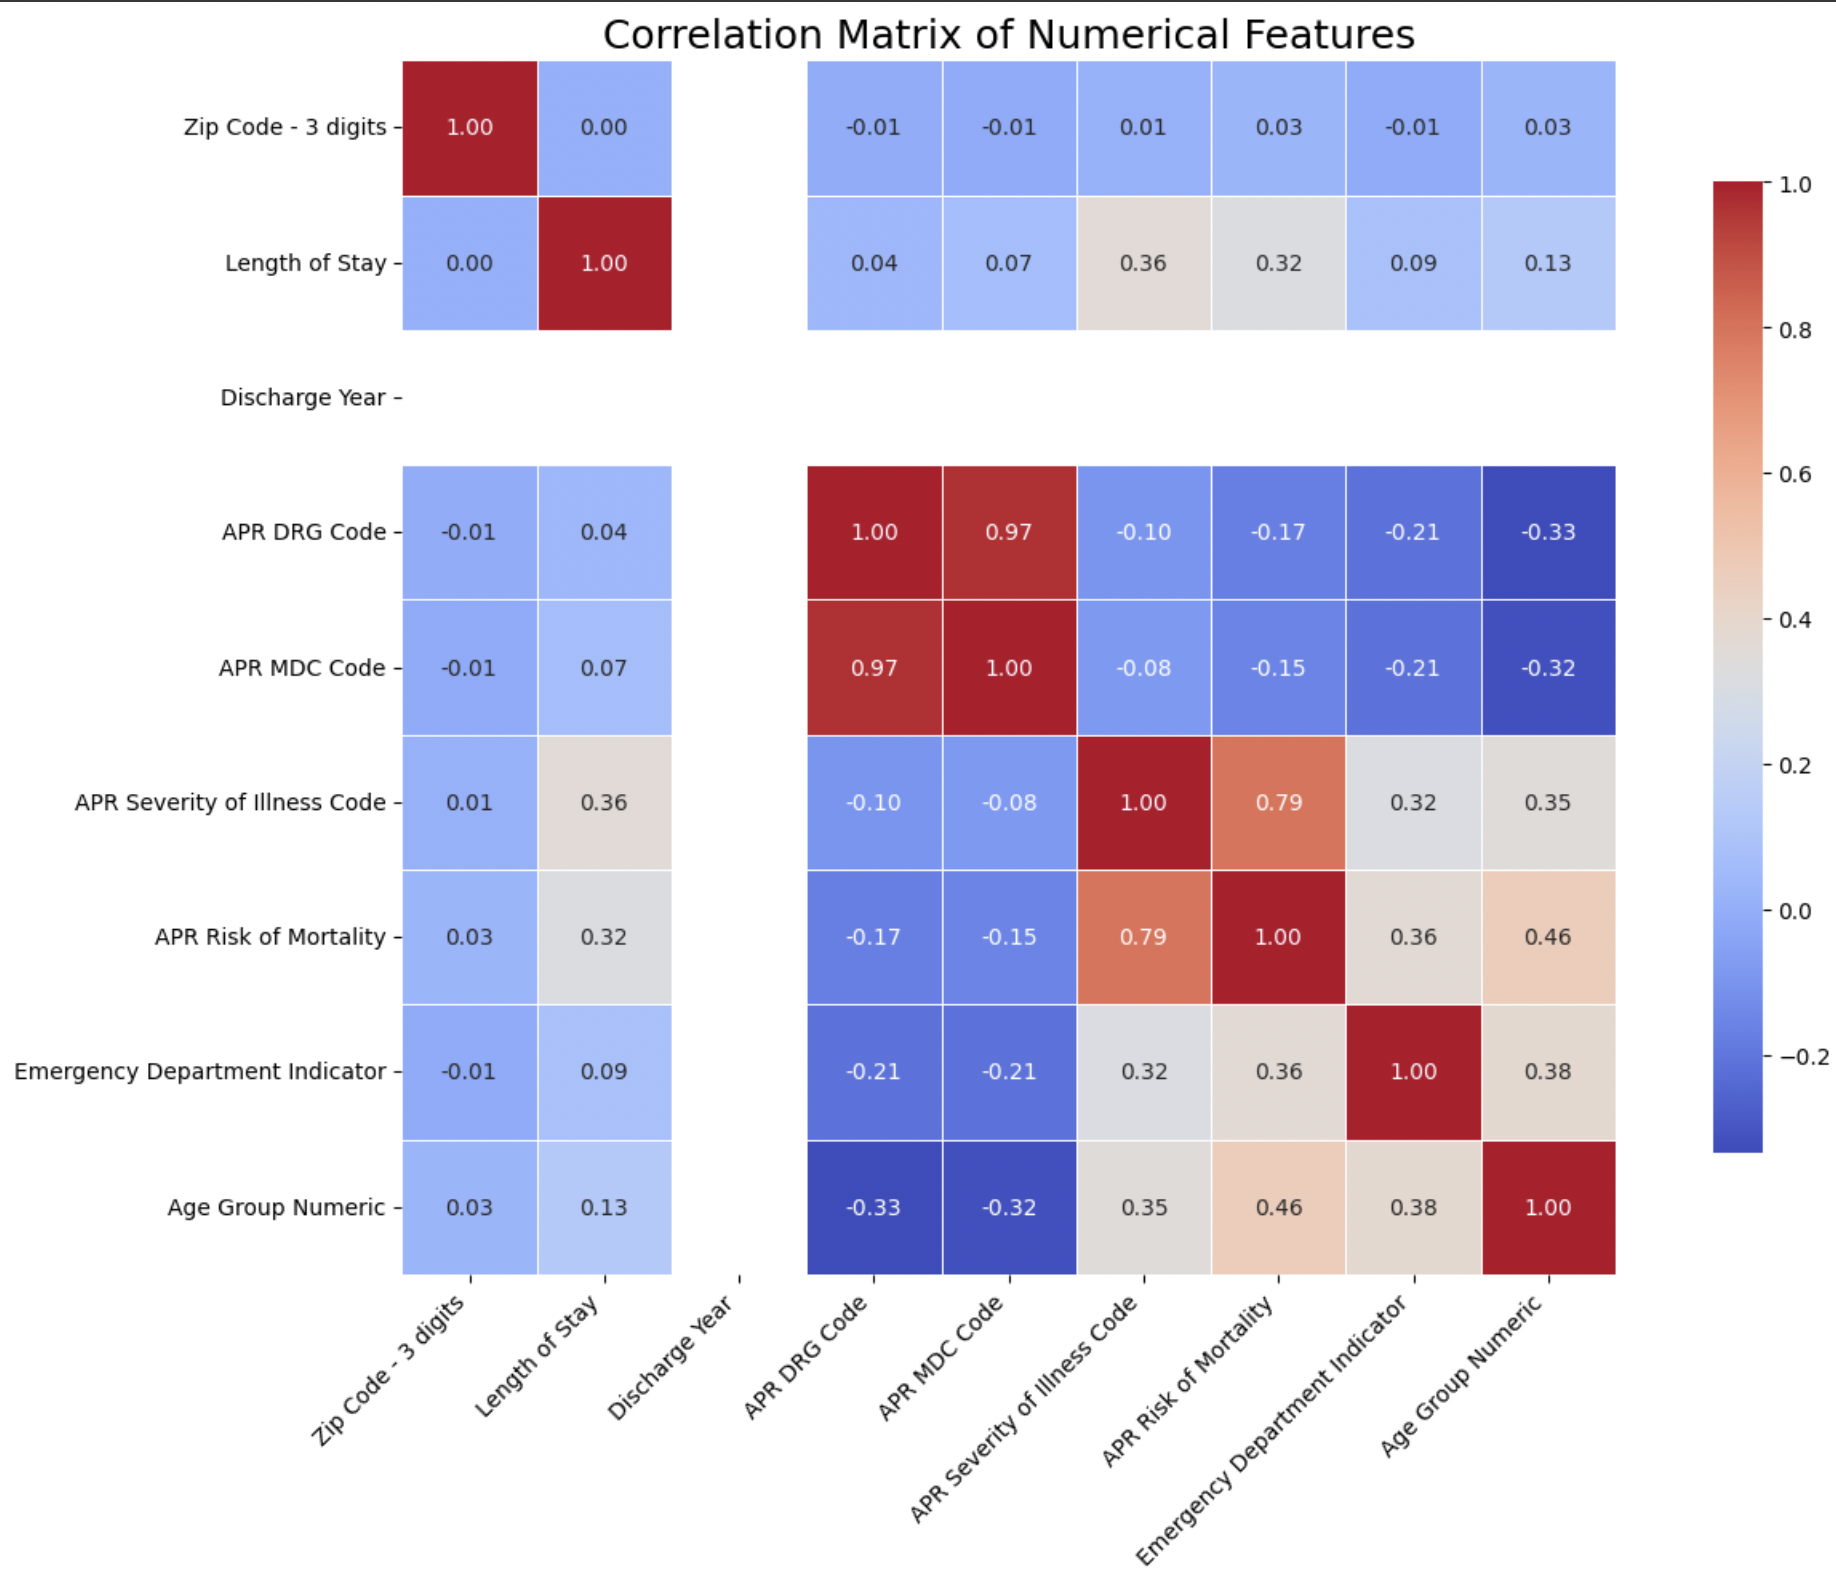

This correlation matrix reveals critical relationships between numeric variables in the NYC hospital discharge dataset. The most significant correlations for discharge modeling are between clinical severity indicators and Length of Stay (LOS): APR Severity of Illness Code (0.36) and APR Risk of Mortality (0.32) both show moderate positive correlations with LOS, confirming that clinically complex patients require longer hospitalization. The strong correlation (0.79) between Severity of Illness and Risk of Mortality demonstrates their clinical alignment, while Age Group shows meaningful associations with Risk of Mortality (0.46) and Emergency Department use (0.38). APR DRG and MDC Codes are highly correlated (0.97) with each other but show negative relationships with Age Group (-0.33, -0.32), suggesting different diagnostic groupings by age. These correlations provide valuable input for the machine learning model, particularly highlighting how clinical severity metrics can predict resource utilization and identify discharge candidates, while demographic factors like Zip Code (showing minimal correlations) may be less predictive in optimizing bed turnover and operational efficiency.











## Feature Relationship Exploration


To gain deeper insight into how individual features influence hospitalization duration, we explored several key variables in relation to Length of Stay. Patients admitted through the emergency department consistently exhibited longer stays compared to elective or urgent admissions, highlighting the impact of acute, unplanned care on resource utilization.







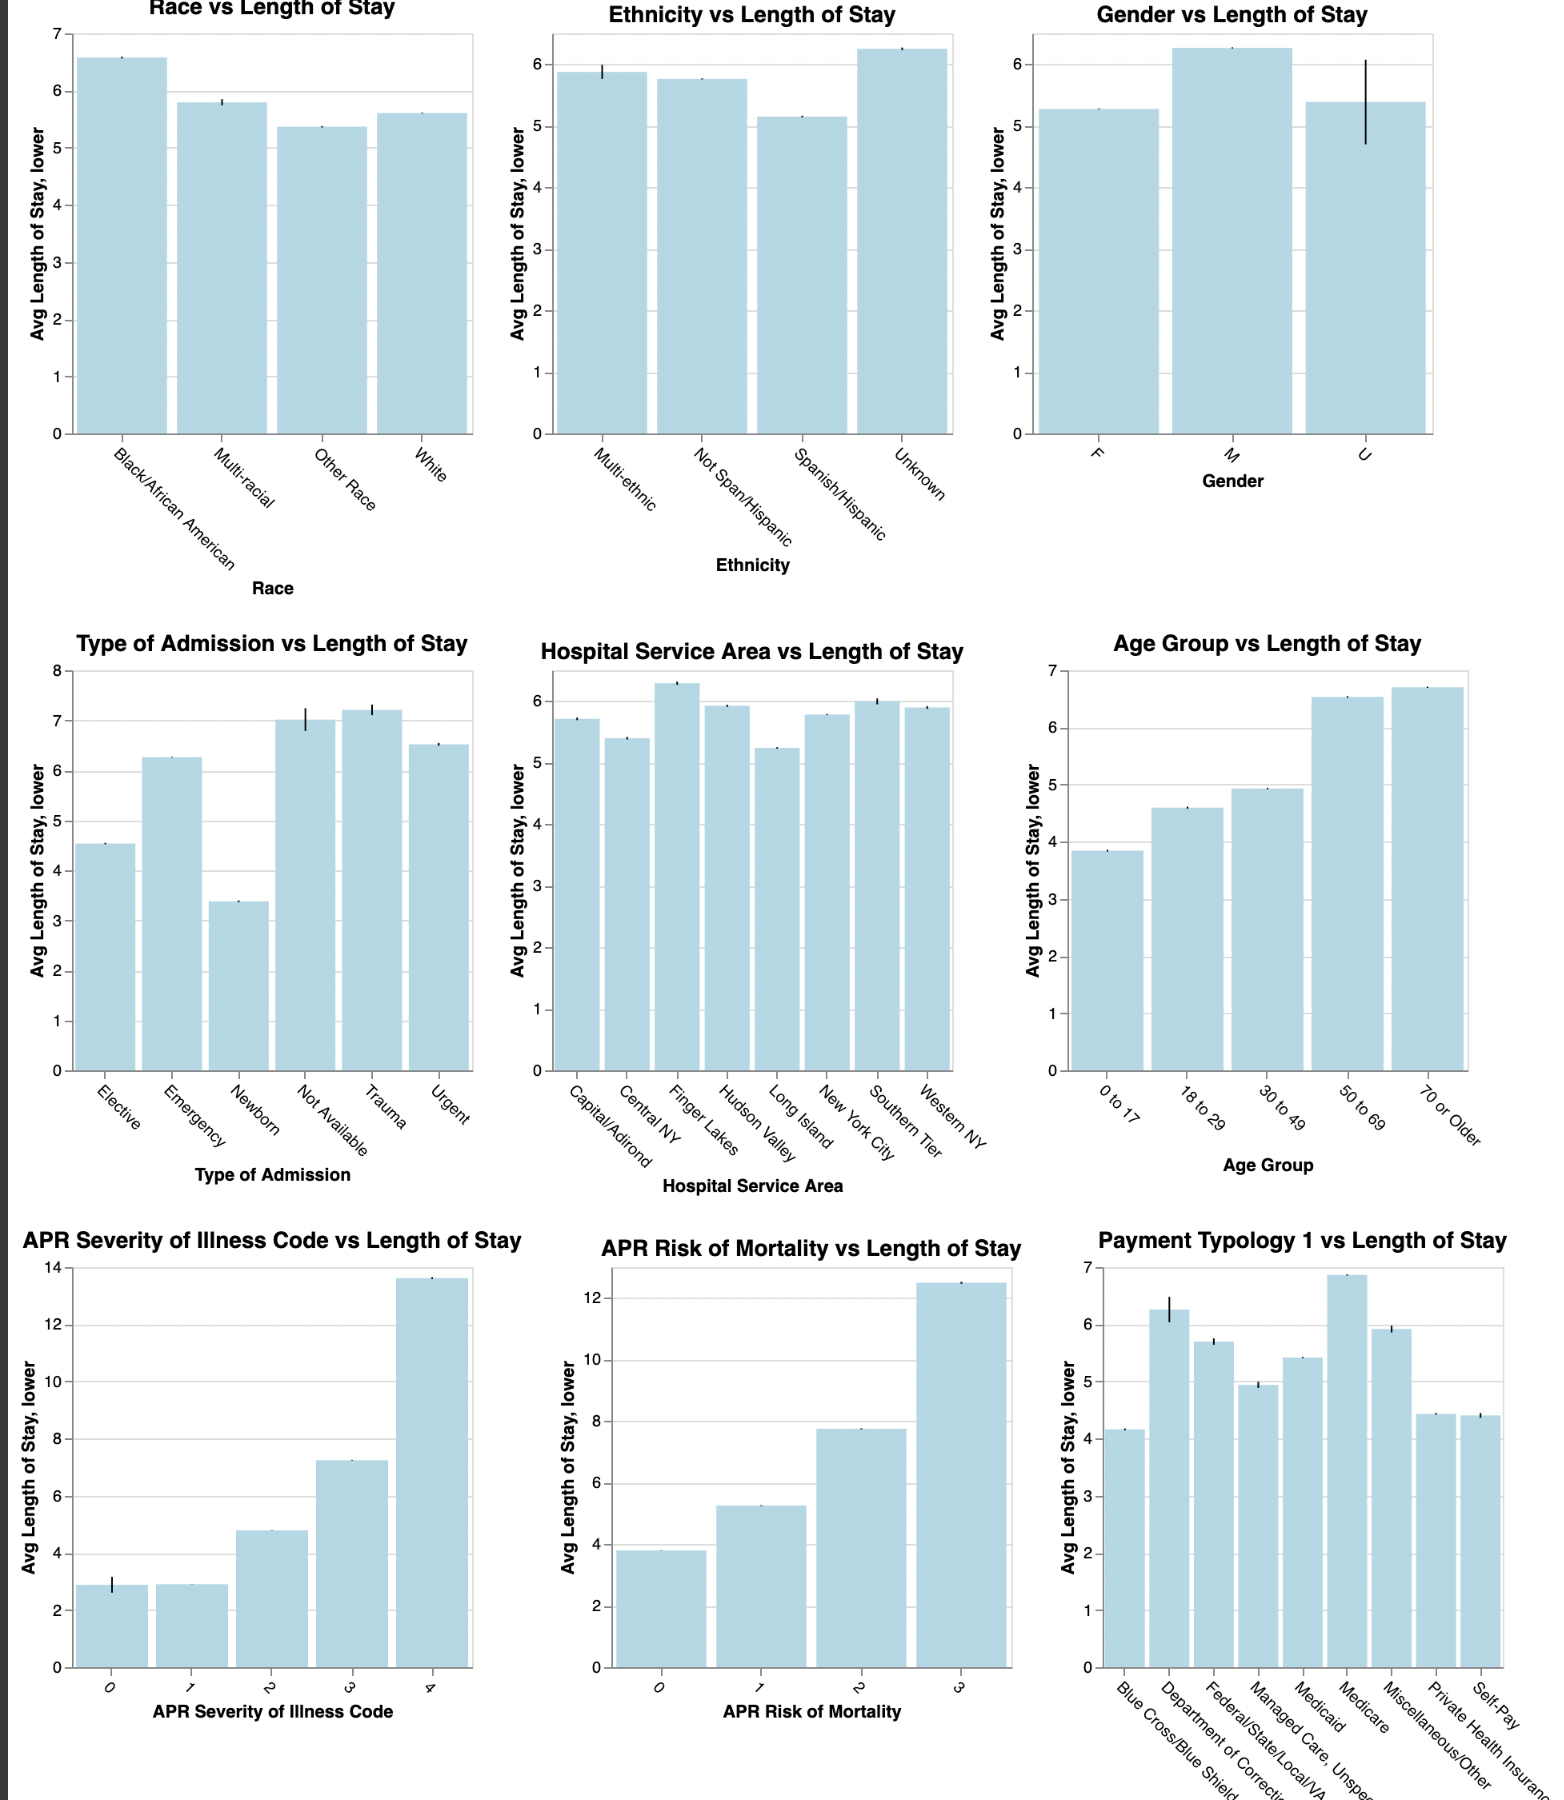

The above charts display the correlation between various patient factors and the average Length of Stay (LOS) in New York City hospitals, a critical metric for discharge prioritization modeling. The nine charts reveal several clinically and operationally significant patterns: Black/African American patients experience longer hospital stays (≈6.7 days) compared to other racial groups; males have higher average LOS than females; and trauma admissions require substantially longer hospitalization periods (≈7.1 days) than elective procedures. Most notably, clinical indicators show strong correlations with LOS - APR Severity of Illness and Risk of Mortality scores demonstrate clear positive relationships with hospitalization duration, with the highest severity patients staying approximately 13.5 days. Age also shows a consistent upward trend with LOS, with elderly patients (70+ years) staying nearly 3 days longer than pediatric patients. These demographic and clinical relationships provide essential insights for developing the machine learning model to optimize discharge prioritization and resource allocation.

**Feature selection using PCA**

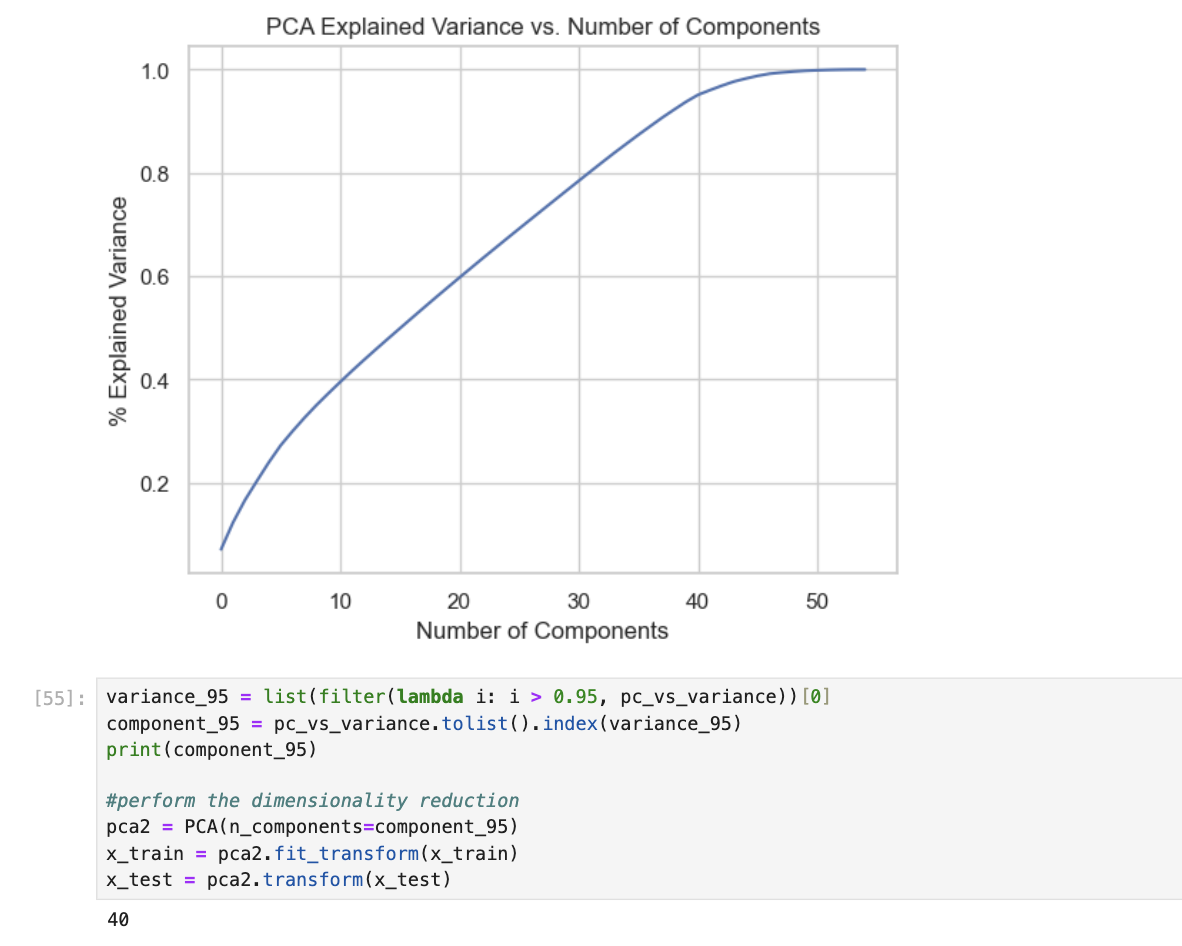

**Figure:** This figure illustrates the cumulative variance captured as we increase the number of PCA components for our length-of-stay prediction dataset. It shows that about 40 components are enough to explain over 95% of the total variance. By reducing our feature space to these 40 dimensions, we retain nearly all the informational content while simplifying the model. This compression helps prevent overfitting, speeds up training, and preserves predictive accuracy.

**Evaluation Metrics Chosen: Weighted recall**

Avoiding accuracy: Our length-of-stay bins are highly imbalanced (far more 1–3-day cases than 7+-day cases), so a naive classifier that predicts the majority class could score high overall accuracy while completely missing rare but critical long-stay patients.

Favoring recall: We prioritize correctly identifying each stay-length category—especially the underrepresented mid- and long-stay bins—so we measure recall (sensitivity) to capture as many true positives as possible and minimize false negatives in those harder-to-predict groups.

# **Baseline Model - Logistic Regression**

We chose Logistic Classification for our classification as the baseline model.

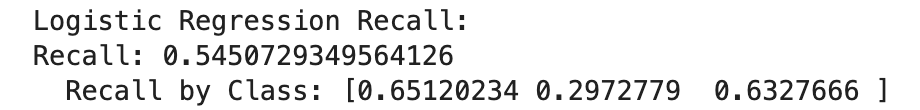

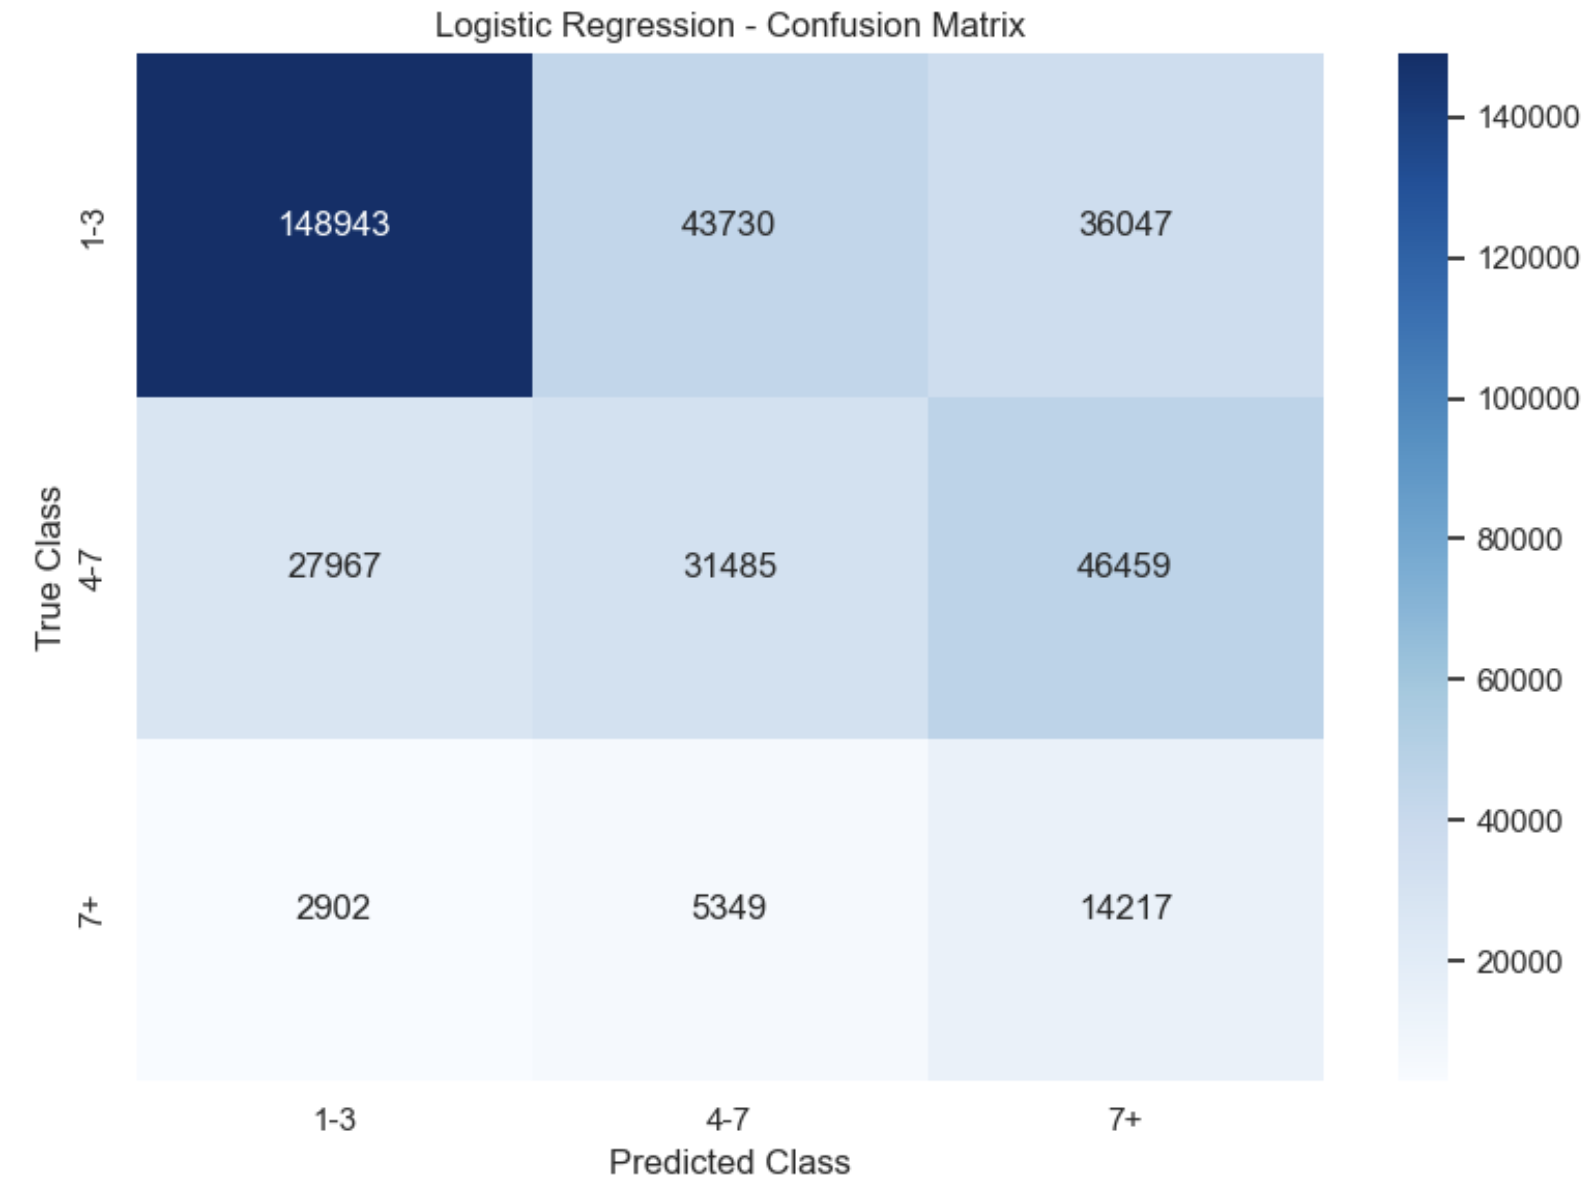

**Figure**:
The confusion matrix shows that our multinomial logistic regression does a reasonably good job separating short stays (1–3 days) — with 148943 correct predictions — but struggles most with the mid-range bin (4–7 days), where only about 31485 of 105 111 true cases are caught (recall \~0.30). The longest‐stay bin (7+ days) fares better (recall \~0.63), but there are still 5 349 mid- and 2 902 short-stay cases misclassified as 7+ days. We began with this simple, interpretable baseline to establish a performance floor; next steps include decision trees or other non-linear models to capture more complex patterns and boost recall on the harder-to-predict middle class.


# **Other Models**

Decision Tree

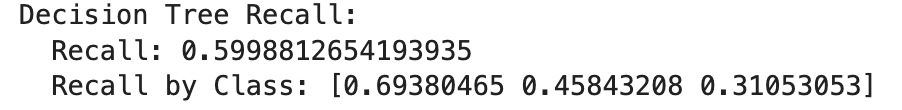

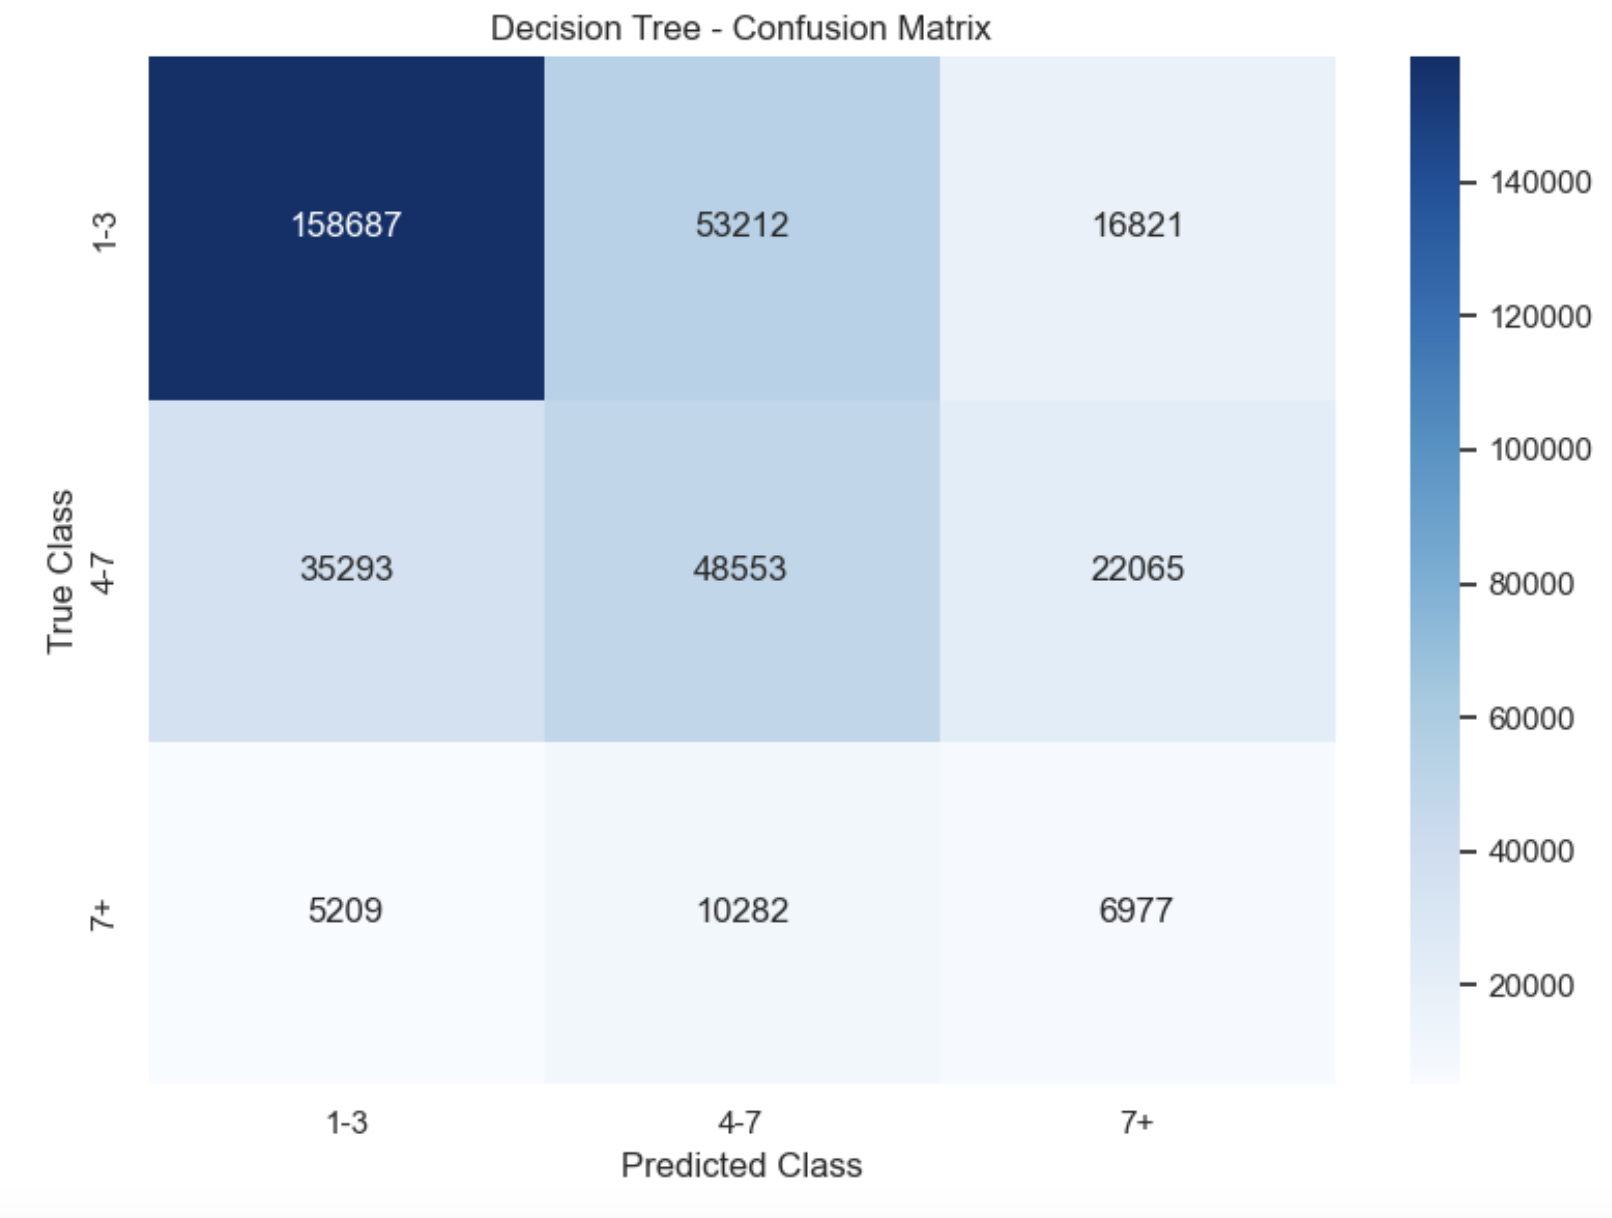

Ensemble Model

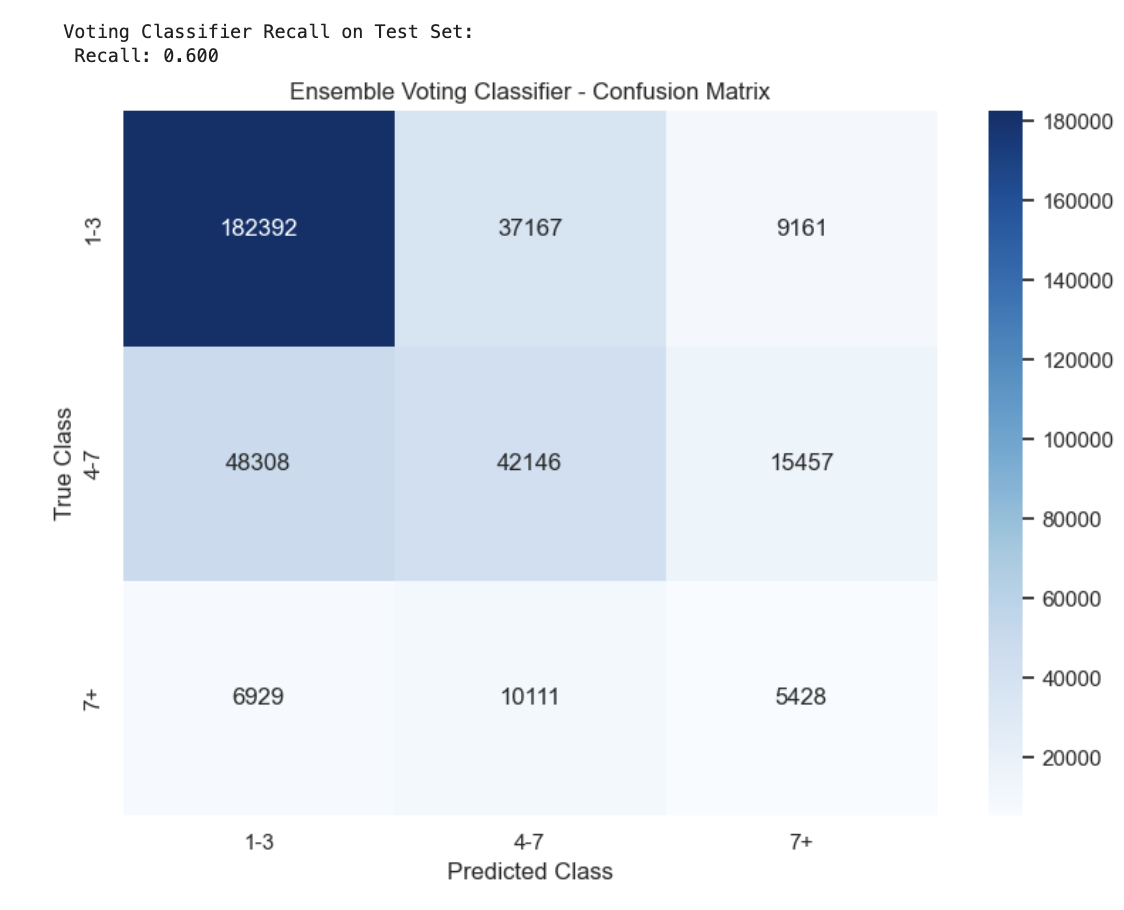

XGBoost

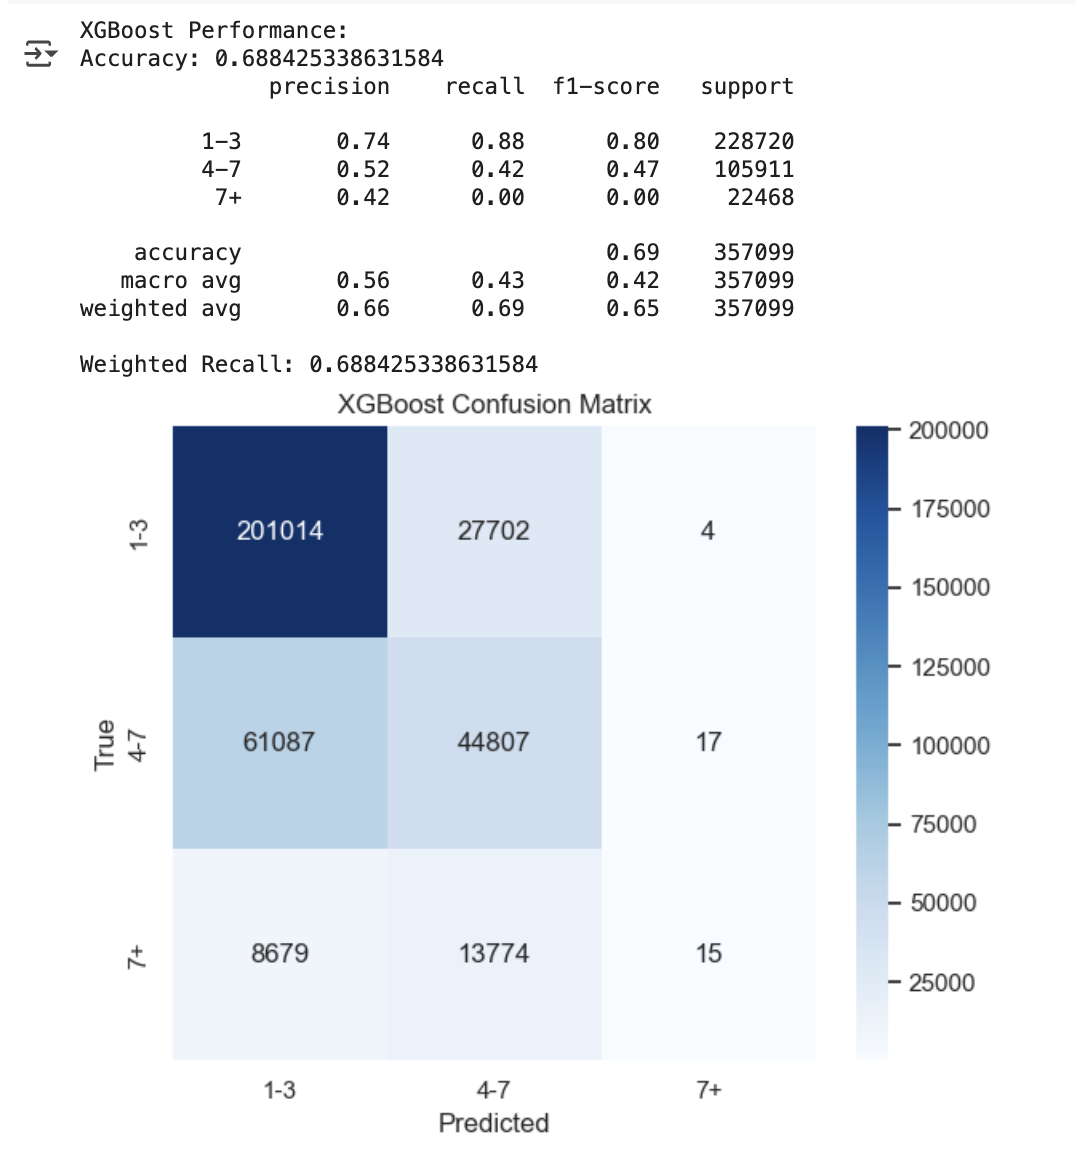

Feature Importance for Decision Making

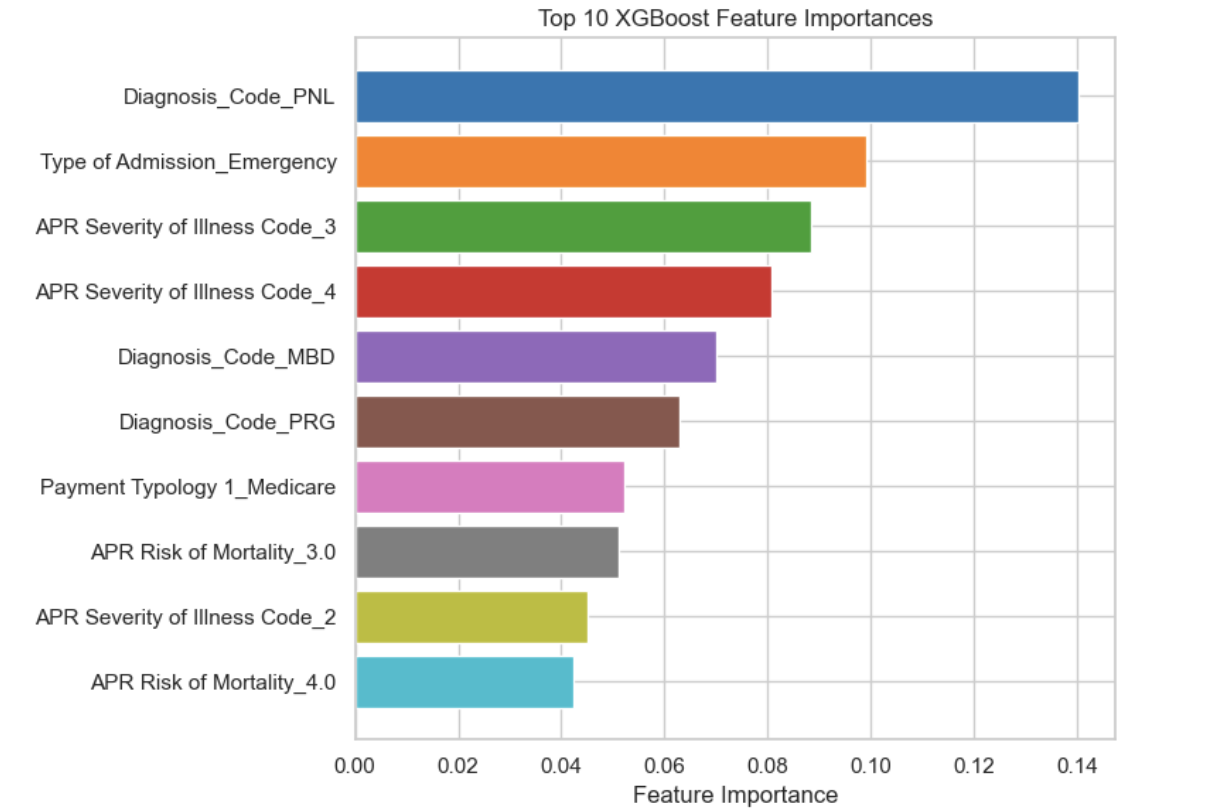

This horizontal bar chart (feature importance) highlights the ten most influential predictors in our XGBoost length-of-stay model, with each bar color-coded for visual clarity. “Diagnosis_Code_PNL” leads by a wide margin (~0.14 importance), followed by “Type of Admission_Emergency” and higher APR severity levels (Codes 3 and 4). Clinical factors like principal diagnosis, admission urgency, and illness severity clearly drive the model’s decisions. Understanding these top features helps us focus on key drivers of stay duration and guides further feature engineering or targeted interventions.

# **Purpose of this analysis**

The primary purpose of this analysis is to build a machine learning model that helps hospitals optimize discharge decisions by predicting a patient's likely Length of Stay (LOS) category. By doing so, administrators can proactively identify patients who are clinically and operationally ready for discharge, supporting more efficient bed utilization and reduced healthcare costs. After thorough preprocessing and feature selection, the model leverages a focused set of high-impact variables—such as severity of illness, risk of mortality, type of admission, emergency department status, and patient age—to make informed, data-driven predictions. These features were chosen based on their correlation with LOS and their relevance to clinical decision-making. Ultimately, this system aims to balance operational efficiency with patient safety by identifying short-stay candidates accurately while highlighting those who require extended care to avoid premature discharge and potential readmission penalties.










# **Methodology**

To address the task of predicting patient discharge readiness, we framed the problem as a multi-class classification task by categorizing Length of Stay (LOS) into short (1–3 days), medium (4–7 days), and long (7+ days) buckets. We began with baseline models such as logistic regression, decision trees, and random forests to establish performance benchmarks and understand feature behavior. These models showed limited ability to capture complex patterns, particularly in imbalanced classes. We ultimately selected the XGBoost classifier for its robustness with structured healthcare data and its ability to handle class imbalance more effectively. The model was fine-tuned using cross-validation, and class weights were adjusted to mitigate bias toward the dominant short-stay category. For evaluation, we emphasized recall as the key metric, prioritizing the model's ability to correctly identify patients in each class—especially those requiring longer stays—to avoid premature discharges. Performance was assessed using accuracy, precision, recall, F1-score, and a confusion matrix, with XGBoost showing strong results for short-stay prediction, but highlighting the need for further improvements in long-stay patient detection.










# **References**


- https://www.nature.com/articles/s43856-024-00673-x#data-availability
- https://gothamist.com/news/is-nyc-running-out-of-childrens-hospital-beds-state-officials-wont-say

*The code for all above plots can be found in .ipynb files*